### WORLDBANK INFLATION, CUSTOMER PRICES - DATA VISUALIZATION

### DATA SOURCE

Data source is The World Bank, data consists of Inflation, consumer prices (annual %)  of .. countries. We will analyze the rates over years 1960-2021 with Plotly library

URL: https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG

URL to CSV: https://api.worldbank.org/v2/en/indicator/FP.CPI.TOTL.ZG?downloadformat=csv

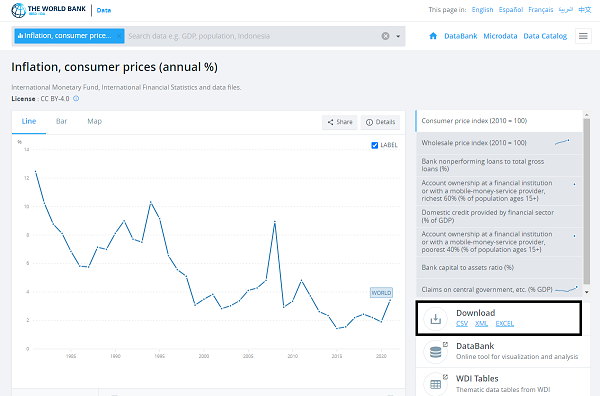

In [ ]:
#Libraries are imported 
#EDA
import pandas as pd
import numpy as np
#Visualisation
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [ ]:
data = pd.read_csv("data.csv",skiprows=3); data.head()

In [ ]:
data.info()

In [ ]:
#Indicator Name column includes only one value:Inflation, consumer prices (annual %). This is not a feature bu a column name
data["Indicator Name"].value_counts()

In [ ]:
#Indicator Name column includes only one value:FP.CPI.TOTL.ZG. This is not a feature bu a column name
data["Indicator Name"].value_counts()

In [ ]:
#Unnamed: 66 column has only null values
data["Unnamed: 66"].value_counts()

In [ ]:
#Drop unnecessary columns, having 0 or 1 value,  "Indicator Name","Indicator Name","Unnamed: 66"
data_prep = data.drop(["Indicator Name","Indicator Code","Unnamed: 66"], axis=1)

In [ ]:
#No duplicate country code
data_prep["Country Code"].duplicated().sum()

In [ ]:
#No duplicate country code
data_prep["Country Name"].value_counts()

Post-demographic dividend,Euro area ,OECD members , Latin America & the Caribbean are not countries, but regions

In [ ]:
regions = ["Post-demographic dividend","Euro area" ,"OECD members" , "Latin America & the Caribbean (IDA & IBRD countries)"]

data_prep[data_prep["Country Name"].isin(regions)]

In [ ]:
region_codes = data_prep[data_prep["Country Name"].isin(regions)]["Country Code"]

In [ ]:
#install and import pyplot library to serach these regions country codes
#pip install pycountry

In [ ]:
import pycountry

In [ ]:
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)] ; list_alpha_3[0:5]

In [ ]:
[list_alpha_3.count(r) for r in region_codes]

It is concluded that Post-demographic dividend,Euro area ,OECD members , Latin America & the Caribbean country codes are not country codes according to ISO alpha 3 code list, which other countries is. So we will drop these rows

In [ ]:
data_prep = data_prep.drop(data_prep[data_prep["Country Code"].isin(region_codes)].index, axis=0)

In [ ]:
data_prep[data_prep["Country Code"].isin(region_codes)]

In [ ]:
data_prep.head()

In [ ]:
#Check for missing values
data_prep.isna().sum()

In [ ]:
#Drop missing values and convert the values to float with 2 decimals for visualising purpose

In [ ]:
data_prep = data_prep.dropna(axis=0)

In [ ]:
for i in range(2,len(data_prep.columns)):
    data_prep.iloc[:,i] =  pd.to_numeric(data_prep.iloc[:,i].map('{:.2f}'.format))

In [ ]:
data_prep.head()

In [ ]:
#Create Bubble Map for Research Expenditures in 2017

df = data_prep[data_prep.loc[:,"2021"] >0][["Country Code","Country Name","2021"]]
fig = px.scatter_geo(df,locations="Country Code",hover_name="Country Name" , size = "2021",color="2021",title="2021 - World Inflation, consumer prices (annual %)")
fig.show()

In [ ]:
df_Turkey = data_prep[data_prep["Country Name"]=="Turkey"].T[2:]
df_Turkey.columns=["TUR"]
fig = px.bar(df_Turkey,x = df_Turkey.index, y = "TUR", title = "Inflation, consumer prices (annual %) of Turkey (1960-2021)")
fig.show()

Next, to see the change of inflation rates of countries over the years, I will create animated box plot with Plotly.
To do this, Plotly forces to x and y axises shapes are the same, so i will transform our data frame to look like this

Country_Code |  Country_Name | Year | Inflation Rate
-----------  -------------  ---  -------------

In [ ]:
d=[]
for i in data_prep.index:
    for j in data_prep.columns[2:]:
        inf_rate=data_prep.loc[i,j]
        country_name= data_prep.loc[i]["Country Name"]
        d.append((i,country_name,int(j),float(inf_rate)))

In [ ]:
df_test= pd.DataFrame(d,columns=["Country_Code","Country_Name","Year","Inflation_Rate"])

In [ ]:
df_test = df_test.sort_values(by=["Year","Inflation_Rate"],ascending=[True,False])

In [ ]:
df_test.head()

In [ ]:
fig = px.bar(
    df_test,
    x="Inflation_Rate",
    y="Country_Name",
    #text="Inflation_Rate",
    color="Country_Name",
    orientation="h",
    animation_frame="Year",
    width=1200,
    height=600,
)
fig.show()